In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

<Figure size 432x288 with 0 Axes>

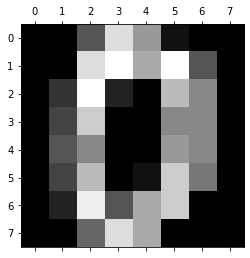

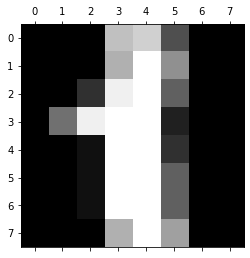

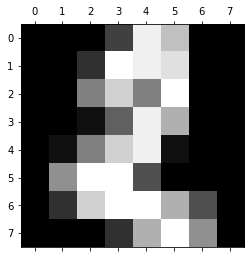

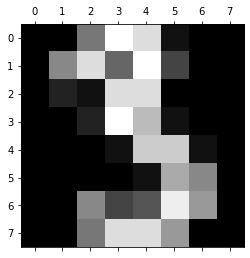

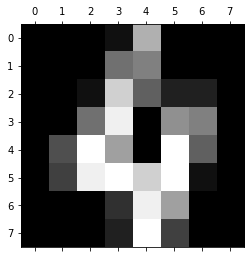

In [5]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [6]:
df = pd.DataFrame(digits.data)

In [7]:
df['target']=digits.target

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df.target, test_size=0.2)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
reg = LogisticRegression(max_iter=10000)
reg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [12]:
reg.score(X_test,y_test)

0.9722222222222222

In [13]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [14]:
svm_model.score(X_test,y_test)

0.9888888888888889

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
rf.score(X_test, y_test)

0.9777777777777777

# SeaBorn Library

In [17]:
y_predicted = reg.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)

In [19]:
cm

array([[26,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  1,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  3, 33]])

Text(0.5, 42.0, 'Predicted')

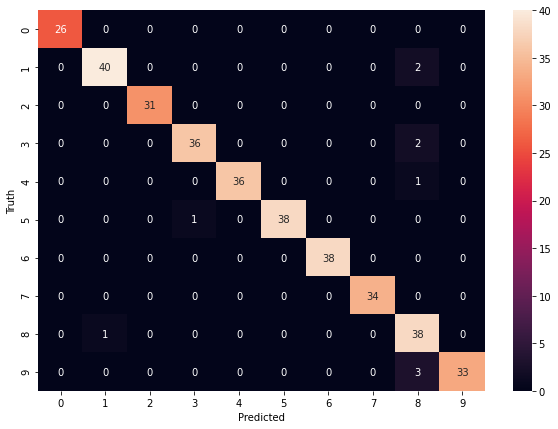

In [20]:
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot = True)
plt.ylabel('Truth')
plt.xlabel('Predicted')